In [1]:
import numpy as np
import nlp as nlp_hlp
import helpers_and_variables as hlp
import ML_helpers as ml_hlp
import shap
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
# import pixiedust
# %%pixie_debugger

In [ ]:
# """
# read the row data as pd data frame
# """
# dataPath = "C:/Users/a7mad/Desktop/MEX/PekLung/PekLUng_20210503sav.xlsx"
# password = None#
# rawdataDF = hlp.get_exL_df(stringPath=dataPath, password=password, sheetNum=1)
# rawdataDF = rawdataDF.iloc[1: , :]

# """ 
# read the data info as pd data frame
# """
# dataInfoPath = "C:/Users/a7mad/Desktop/MEX/PekLung/Datainformation_minroAdjusted.xlsx"
# dataInfoDF = hlp.get_cleaned_dataInfo_df(dataInfoPath)
# katInfoDF = hlp.get_cleaned_katInfo_df(dataInfoPath)
# """
# get dictionary of data information from data info data fram
# """
# # dict_of_katInfo = hlp.get_dict_of_katInfoDF(katInfoDF)
# dict_of_dataInfo = hlp.get_dict_of_dataInfoDF(dataInfoDF)
# """ 
# Get the labels, under name Lungcancer_Num
# check whether labels are 1=yes LC or 2=No LC and check STUDY_1 if valid, remove unlabeled and invalid patients

# """
# rawdataDF, labels = hlp.get_labels_and_indices_unlabeled_patients(rawdataDF)

# target = pd.DataFrame(data=labels, index=rawdataDF.index)
# target.columns = ['Lungcancer_Num']
# # 1 yes have LC, 0 No dont have LC 
# target = target.Lungcancer_Num.apply(lambda x: 1 if x == 1 else 0)
# labels = target
# del target
# """
# Remove features, which includes information about the label inlucding Lungcancer_num, like diagnos2, aslo modules names
# DiagnosticInvestigation (need to be discussed, since it includes dignostic which means non early prediction).
# columns_tobe_removed=None --> predefind columns will be removed, see the function in helpers_and_variables file.
# remove_cols_with_dates=True --> removes all columns with dates(this is relevance in case of tfidf), 
# otherwise consider using converting dates to days, see function hlp.get_dates_in_days() in next cell.
# """
# copy_rawdata =  hlp.get_dataframe_without_cols(rawdataDF, columns_tobe_removed=None, remove_cols_with_dates=True)
# levitsky_rawdata = hlp.get_dataframe_with_specific_cols(rawdataDF)
# del rawdataDF

# import seaborn as sns
# ages = copy_rawdata['Age']
# sns.displot(ages)
# save_file_name = r"C:\Users\a7mad\Desktop\MEX\data_imgs"
# file_path = save_file_name + r"ages"+".pdf"
# plt.savefig(file_path)

# df1 = pd.DataFrame(10*np.random.randn(len(ages), 1))
# df1['Age'] = copy_rawdata['Age'].values
# # df1['Age'] 
# conds = [df1.values <= 40.0 , df1.values <= 65.0,  df1.values <= 85.0 , df1.values > 85.0]
# choices = ['under40Years', '40To65Years', '65To85Years', 'Over85Years']

# df1 = pd.DataFrame(np.select(conds, choices, default='zero'),
#              index=copy_rawdata.index,
#              columns=df1.columns)
# nlp_rawdata = pd.DataFrame.copy(copy_rawdata)
# nlp_rawdata['Age'] = df1['Age']
# del df1, ages, conds, choices, copy_rawdata
# nlp_rawdata
# nlp_rawdata = nlp_rawdata[nlp_rawdata != -2146826288]
# nlp_rawdata = nlp_rawdata[nlp_rawdata != '#NULL!']
# # test = test.fillna(value='None' ,axis=1)
# nlp_rawdata = nlp_rawdata[nlp_rawdata != 'None']
# nlp_rawdata = nlp_rawdata.dropna(axis=1)
# # nlp_rawdata
# """
# get a dictionary of each patient according to this format:
# {Patient number: {questions name, the questions text, corresponding answers}}
# If clear_missings_or_Non true, it clears questions (features),
# where answeres are missing or the answers is no/missing.
# amount_data = None --> all data is considered
# """
# data_frame_to_clean = nlp_rawdata
# main_dict, ind_num_removed_features = hlp.get_dict_of_questions_answers(data_frame_to_clean, 
#                                                                         dataInfoDF, 
#                                                                         katInfoDF, 
#                                                                         amount_data =None ,
#                                                                         clear_missings_or_Non=True,
#                                                                         clear_ques_with_negative_answeres=True)
# """
# check how many features were removed by get_dict_of_questions_answers()

# """
# max_num_feature_removed = 0
# ind_of_max_feature_removed = 0

# for ind, count in ind_num_removed_features:
#     if count > max_num_feature_removed:
#         max_num_feature_removed = count
#         ind_of_max_feature_removed = ind
# print("Most number of features removed from a patient is: ", max_num_feature_removed)
# print("Patient index with most removed features is: ", ind_of_max_feature_removed)
# print("Patient number or id: {0}, with remaining number of features: {1}".format(str(int(data_frame_to_clean.iloc[ind_of_max_feature_removed][0])), len(main_dict[str(int(data_frame_to_clean.iloc[ind_of_max_feature_removed][0]))])))
# print("\nTotal length of the main dictionary, number of patients: ", len(main_dict))
# #main_dict[str(int(rawdataDF.loc[ind_of_max_feature_removed][0]))]
# """
# Get a cleaned data list (stemming and removing stop words and other uneseccery digits), with text for each patient
# """
# data_list, corpus_sentenses, corpus_sentenses_tokenized = nlp_hlp.get_data_from_main_dict(main_dict, stemm=True, 
# return_corpus_sent=True, return_corpus_token=False)
# # this would be used for a word2Vec training data, don't forget to set return_corpus_token=True
# # del corpus_sentenses_tokenized
# dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict_removed_dates_nos_missing_None_Null_coverted_age_trimmed2"

# hlp.write_dict_as_json_file(main_dict, dict_path)

In [2]:
"""
read the data
"""
labels = hlp.load_list_from_json_file()
# dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict_nodates"
# dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict"
# dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict_removed_nos_nodates"

# dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict_removed_dates_nos_coverted_age"
# dict_all = hlp.load_dict_from_json_file(dict_path)

dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict_removed_dates_nos_missing_None_Null_coverted_age_trimmed2"
dict_all = hlp.load_dict_from_json_file(dict_path)

dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict_70V_removed_dates_missing_nos_coverted_age"
dict_70v = hlp.load_dict_from_json_file(dict_path)
dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict_63D_removed_dates_missing_nos_coverted_age"
dict_63d = hlp.load_dict_from_json_file(dict_path)
dict_path = "C:/Users/a7mad/Desktop/MEX/PekLung/dict_7B_removed_dates_missing_nos_coverted_age"
dict_7b = hlp.load_dict_from_json_file(dict_path)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pyopls import OPLS
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_val_score
# from sklearn.metrics import r2_score, accuracy_score
# from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_decomposition import PLSRegression

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

np.random.seed(0)

# from time import time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import scipy
from scipy.stats import randint
from sklearn.utils.fixes import loguniform
from sklearn.metrics import f1_score


# split and balance

started for suffix and digits combs,  False False
Number of features for each patient is:  1092
Number of features for each patient is:  170
Number of features for each patient is:  135
Number of features for each patient is:  42
The set with trimm False and digits False done.
Best test models:  ['svm', 'opls', 'opls', 'opls']
With test scores:  [0.6257631257631258, 0.67989417989418, 0.5724460724460725, 0.7037037037037037]
started for suffix and digits combs,  True False
Number of features for each patient is:  1051
Number of features for each patient is:  142
Number of features for each patient is:  118
Number of features for each patient is:  24
The set with trimm True and digits False done.
Best test models:  ['opls', 'opls', 'opls', 'opls']
With test scores:  [0.6345136345136346, 0.6831501831501832, 0.594017094017094, 0.7108262108262109]
started for suffix and digits combs,  False True
Number of features for each patient is:  448
Number of features for each patient is:  170
Number 

TypeError: keys must be str, int, float, bool or None, not tuple

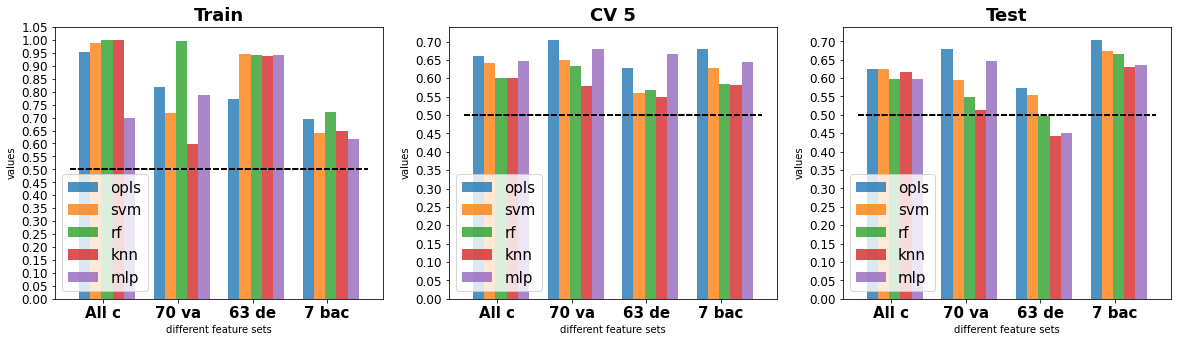

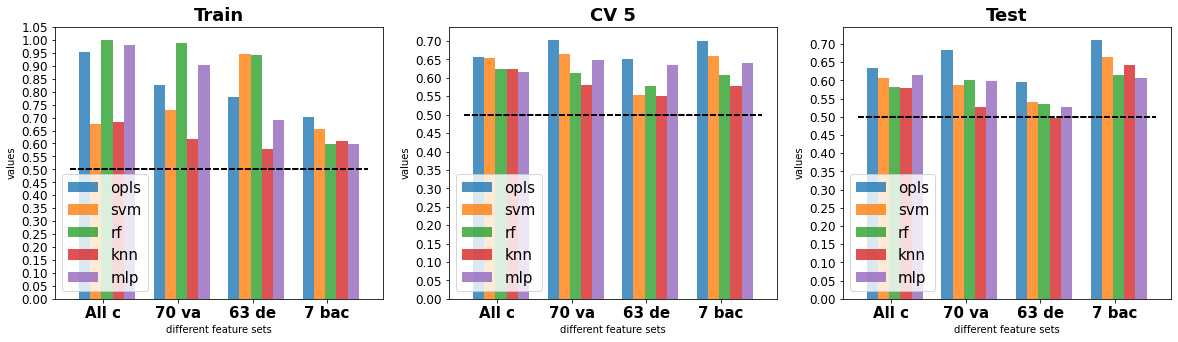

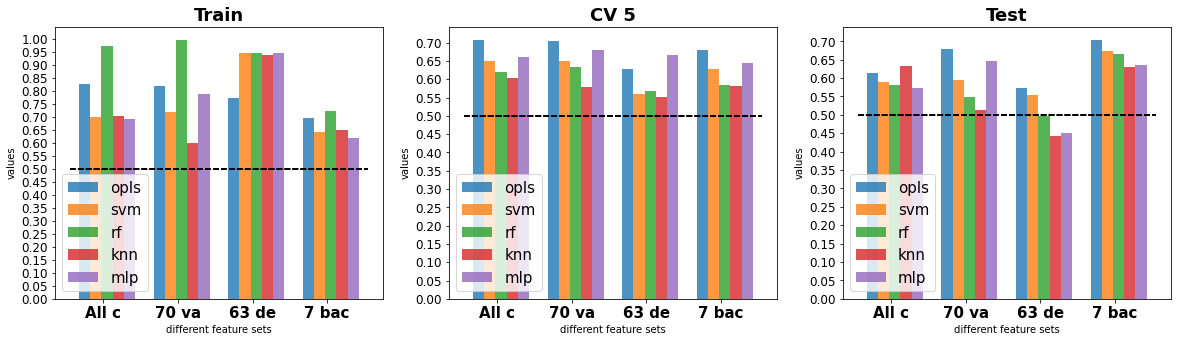

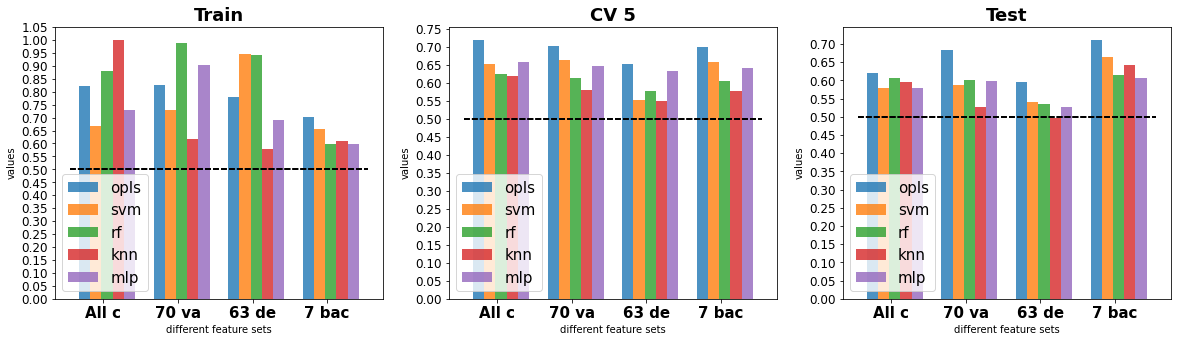

In [7]:
combinations = [(False, False), (True, False), (False, True), (True, True)]
all_test_dicts = dict()
vectorizer = 'tfidf'
random_state = 42
cv=5
split_size = 0.2
n_iter = 220
dicts = [dict_all, dict_70v, dict_63d, dict_7b]
dict_names = ['All cleaned', '70 variables','63 descriptors', '7 back. variables']

for combs in combinations:
    suffix_41 = combs[0]
    without_digits = combs[1]
    print("started for suffix and digits combs, ", suffix_41, without_digits)
    results = dict(); opls_dict = dict(); svm_dict = dict(); rf_dict = dict(); knn_dict = dict(); mlp_dict = dict(); 
    dict_best_params = dict()

    best_test = [0 for i in range(len(dict_names))]
    best_test_model = ['' for i in range(len(dict_names))]

    for _dict in range(len(dicts)):
        data_list, corpus_sentenses, corpus_sentenses_tokenized = nlp_hlp.get_data_from_main_dict(dicts[_dict], stemm=True, 
            return_corpus_sent=True, return_corpus_token=False, without_digits=without_digits, suffix_41=suffix_41)

        x_train, x_test, y_train, y_test = ml_hlp.get_train_test_split_data(data_list, labels, stratify = labels,
                                                      test_size=split_size, random_state=random_state, shuffle = True)

        vectorizer = ml_hlp.get_tfidf_vectorization_model(corpus_sentenses)
    #     features = vectorizer.get_feature_names_out()
        print("Number of features for each patient is: ", len(vectorizer.get_feature_names_out()))

        all_data_vectorized = ml_hlp.get_tfidf_vectorized_data(tfidf_model=vectorizer,
                                                          to_be_vectorized_data=data_list)

        all_data_vectorized = ml_hlp.get_csr_matrix(all_data_vectorized)
        min_max = preprocessing.MinMaxScaler()

        min_max = min_max.fit(all_data_vectorized)
        del all_data_vectorized

        X_train_vectorized = ml_hlp.get_tfidf_vectorized_data(tfidf_model=vectorizer,
                                                              to_be_vectorized_data=x_train)
        X_test_vectorized = ml_hlp.get_tfidf_vectorized_data(tfidf_model=vectorizer, 
                                                            to_be_vectorized_data=x_test)

        X_train = min_max.transform(ml_hlp.get_csr_matrix(X_train_vectorized))
        X_test = min_max.transform(ml_hlp.get_csr_matrix(X_test_vectorized))

        Y_train = np.array(y_train, dtype='float')
        Y_test = np.array(y_test, dtype='float')
        del X_train_vectorized, X_test_vectorized, min_max

        opls = OPLS(2)
        opls.fit(X_train, Y_train)
        z_train = opls.transform(X_train)
        z_test = opls.transform(X_test)
        pls = PLSRegression(1)
        pls.fit(z_train, Y_train)

        y_pred = cross_val_predict(pls, z_train, Y_train, cv=StratifiedKFold(cv))
        threshed_values = np.array(y_pred)
        best = 0
        best_thresh = 0
        for thresh in np.unique(y_pred):
            threshed_values[y_pred<thresh]=1
            threshed_values[y_pred>=thresh]=2
            score = roc_auc_score(Y_train, threshed_values)
            if score > best:
                best=score
                best_thresh=thresh
                
        std = y_pred[y_pred>=best_thresh].std()
        
        y_pred[y_pred<best_thresh]=1
        y_pred[y_pred>=best_thresh]=2
        cv_score = roc_auc_score(Y_train, y_pred)
        
        y_pred = pls.predict(z_train)
        y_pred[y_pred<best_thresh]=1
        y_pred[y_pred>=best_thresh]=2
        train_score = roc_auc_score(Y_train, y_pred)
        
        y_pred = pls.predict(z_test)
        y_pred[y_pred<best_thresh]=1
        y_pred[y_pred>=best_thresh]=2
        test_score = roc_auc_score(Y_test, y_pred)
        f1_Score = f1_score(Y_test, y_pred)
        
        dict_best_params['opls '+ dict_names[_dict]] = {'best_thresh': best_thresh}
        
        opls_dict[dict_names[_dict]] = {'Train': [train_score], 
                            'CV 5': [cv_score, std],
                            'Test' : [test_score, f1_Score]}

        if test_score > best_test[_dict]:
            best_test[_dict] = test_score
            best_test_model[_dict] = 'opls'

        del opls, pls
        svm = SVC(probability=True, 
              random_state=random_state, class_weight = "balanced")

        param_distributions = {"gamma": loguniform(0.0001, 2),
                               "kernel": ['rbf', 'linear'],
                               "degree": [2,3],
                               "C": loguniform(0.001, 2)#, #[0.001, 0.01, 0.03, 0.1, 1, 2]
                               }
        search = RandomizedSearchCV(svm, param_distributions,
                                       n_iter= n_iter,
                                       verbose = 0,
                                       cv = StratifiedKFold(cv),
                                       n_jobs=-1,
                                       error_score='raise',
                                       random_state=random_state).fit(X_train, Y_train)
        svm = search.best_estimator_
        dict_best_params['svm '+dict_names[_dict]] = search.best_params_

        cv_score = cross_val_score(svm, X_train, Y_train,  cv=StratifiedKFold(cv), n_jobs=-1, scoring='roc_auc', error_score='raise')
        test_score = ml_hlp.get_AUC_ROC_value(X_test, Y_test, svm)

        svm_dict[dict_names[_dict]] = {'Train': [ml_hlp.get_AUC_ROC_value(X_train, Y_train, svm)], 
                            'CV 5': [cv_score.mean(), cv_score.std()],
                            'Test' : [test_score,  f1_score(Y_test, svm.predict(X_test))]}
        if test_score > best_test[_dict]:
            best_test[_dict] = test_score
            best_test_model[_dict] = 'svm'


        del svm
        rf = RandomForestClassifier(random_state=random_state, 
                                    class_weight = "balanced", 
                                    max_features='auto',
                                    criterion='entropy')

        param_distributions = {"max_depth": [1, 2, 3, None],
                               "min_samples_split": randint(2, 14),
                               "min_samples_leaf": randint(1, 14),
                               "ccp_alpha": loguniform(0.0001, 1)
    #                            "max_features": ['auto', 'sqrt','log2']
                              }
        search = RandomizedSearchCV(rf, param_distributions,
                                       n_iter=n_iter,
                                       verbose = 0,
                                       cv = StratifiedKFold(cv),
                                       n_jobs=-1,
                                       error_score = 'raise',
                                       random_state=random_state).fit(X_train, Y_train)
        rf = search.best_estimator_
        dict_best_params['rf '+dict_names[_dict]] = search.best_params_

        cv_score = cross_val_score(rf, X_train, Y_train,  cv=StratifiedKFold(cv), n_jobs=-1, scoring='roc_auc', error_score='raise')
        test_score = ml_hlp.get_AUC_ROC_value(X_test, Y_test, rf)
        rf_dict[dict_names[_dict]] = {'Train': [ml_hlp.get_AUC_ROC_value(X_train, Y_train, rf)], 
                            'CV 5': [cv_score.mean(), cv_score.std()],
                            'Test' : [test_score, f1_score(Y_test, rf.predict(X_test))]}

        if test_score > best_test[_dict]:
            best_test[_dict] = test_score
            best_test_model[_dict] = 'rf'

        del rf
        knn = KNeighborsClassifier()
        param_distributions = {"n_neighbors": [3,4,5,7,10],
                               "weights": ['uniform', 'distance'],
                               "leaf_size": list(range(1,12)),
                               "p": list(range(1,3))
                              }
        search = RandomizedSearchCV(knn, param_distributions,
                                       n_iter=n_iter,
                                       verbose = 0,
                                       cv = StratifiedKFold(cv),
                                       n_jobs=-1,
                                       error_score = 'raise',
                                       random_state=random_state).fit(X_train, Y_train)

        knn = search.best_estimator_
        dict_best_params['knn '+ dict_names[_dict]] = search.best_params_

        cv_score = cross_val_score(knn, X_train, Y_train,  cv=StratifiedKFold(cv), n_jobs=-1, scoring='roc_auc', error_score='raise')
        test_score = ml_hlp.get_AUC_ROC_value(X_test, Y_test, knn)
        knn_dict[dict_names[_dict]] = {'Train': [ml_hlp.get_AUC_ROC_value(X_train, Y_train, knn)], 
                            'CV 5': [cv_score.mean(), cv_score.std()],
                            'Test' : [test_score,  f1_score(Y_test, knn.predict(X_test))]}

        if test_score > best_test[_dict]:
            best_test[_dict] = test_score
            best_test_model[_dict] = 'knn'

        del knn
        mlp = MLPClassifier(random_state=random_state, max_iter=1200, 
                            learning_rate='adaptive', batch_size='auto',
                            early_stopping=True);

        param_distributions = {"hidden_layer_sizes": [(7,3), (5,2), (100,)],
                               "activation": ['tanh', 'logistic','relu'],
                               "solver": ['adam', 'lbfgs'],
                               "alpha":  loguniform(0.0001, 1)
                               };

        search = RandomizedSearchCV(mlp, param_distributions,
                                       n_iter=n_iter,
                                       verbose = 0,
                                       cv = StratifiedKFold(cv),
                                       n_jobs=-1,
                                       error_score = 'raise',
                                       random_state=random_state).fit(X_train, Y_train)

        mlp = search.best_estimator_
        dict_best_params['mlp '+dict_names[_dict]] = search.best_params_

        cv_score = cross_val_score(mlp, X_train, Y_train,  cv=StratifiedKFold(cv), n_jobs=-1, scoring='roc_auc', error_score='raise')
        test_score = ml_hlp.get_AUC_ROC_value(X_test, Y_test, mlp)
        mlp_dict[dict_names[_dict]] = {'Train': [ml_hlp.get_AUC_ROC_value(X_train, Y_train, mlp)], 
                            'CV 5': [cv_score.mean(), cv_score.std()],
                            'Test' : [test_score,  f1_score(Y_test, mlp.predict(X_test))]}

        if test_score > best_test[_dict]:
            best_test[_dict] = test_score
            best_test_model[_dict] = 'mlp'

    #     print('%d dict is done'%_dict)
        del X_train, Y_train, X_test, Y_test
    print("The set with trimm {0} and without digits {1} done.".format(str(suffix_41), str(without_digits)))
    print("Best test models: ", best_test_model)
    print("With test scores: ", best_test)
    print("")
    #############################################################################
    to_be_saved_dicts = [opls_dict, svm_dict, rf_dict, knn_dict, mlp_dict]
    names = ['opls', 'svm', 'rf', 'knn', 'mlp']
    save_file_name = r"C:\Users\a7mad\Desktop\MEX\PekLung\results\tfidf"

    for i in range(len(to_be_saved_dicts)):
        results[names[i]] = to_be_saved_dicts[i]
    file_path = save_file_name + r"\best_results\trimm_{0}_digits_{1}".format(str(suffix_41), str(without_digits)) 

    hlp.write_dict_as_json_file(results, 
                                file_path = file_path)

    file_path = save_file_name + r"\best_params\trimm_{0}_digits_{1}".format(str(suffix_41), str(without_digits)) 
    hlp.write_dict_as_json_file(dict_best_params, 
                                file_path = file_path)
    ###############################################################################
    approaches = list(results.keys()) # ['opls', 'svm', 'rf', 'knn', 'mlp']
    sets_names = list(results[approaches[0]].keys()) # ['All variables', '70 variables', '7 back. variables', '63 descriptors ']
    x_labels = [set_name[0:5] for set_name in sets_names] # ['All v', '70 va', '7 bac', '63 de']
    splits_names = list(results[approaches[0]][sets_names[0]].keys()) # ['Train', 'CV 6', 'Test']
    plot_dict = dict()
    for split in splits_names:
        tmp_dict_approach = dict()
        for approach_idx in range(len(approaches)):
            df = pd.DataFrame(results[approaches[approach_idx]])
            tmp_dict_set = dict()
            for column in df.columns:
                tmp_dict_set[column] = df.loc[split, column][0]
            tmp_dict_approach[approaches[approach_idx]] = tmp_dict_set
        plot_dict[split] = tmp_dict_approach

    plt.figure(figsize=(20,5))
    for i in range(len(splits_names)):
        split_name = splits_names[i]
        result_df = pd.DataFrame(plot_dict[split_name])

        approaches = result_df.columns
        variables = list(result_df[approaches[i]].index)

        for ii in range(len(approaches)):
            plt.subplot(1,3,i+1)
            plt.xticks(np.arange(len(x_labels))+0.25, x_labels, weight = 'semibold', fontsize=15)
            plt.yticks(np.arange(0,1.1,0.05), weight = 'roman', fontsize=12)
            plt.bar(x = np.arange(len(variables))+(ii*0.15), height=result_df[approaches[ii]], width=0.15, 
                    label = approaches[ii], alpha=0.8)
            plt.title('{}'.format(split_name), fontsize=18, weight = 'semibold')

            plt.legend(loc='lower left', fontsize=15)#bbox_to_anchor=(1., 1.))#)
            plt.ylabel('values')
            plt.xlabel('different feature sets')
            plt.plot([-0.2, 3.8], [0.5, 0.5], "k--")
    save_file_name = r"C:\Users\a7mad\Desktop\MEX\data_imgs\results_tfidf\new_results"
    plt.tight_layout()
    file_path = save_file_name + r"\trimm_{0}_digits_{1}".format(str(suffix_41), str(without_digits))+".pdf"
    plt.savefig(file_path)
#     plt.show()
    all_test_dicts[str(combs)] = plot_dict['Test']
    
file_path = r"C:\Users\a7mad\Desktop\MEX\PekLung\results\tfidf\best_results\test"
hlp.write_dict_as_json_file(all_test_dicts, 
                            file_path = file_path)

In [11]:
#TODO get F1 score of the best model

In [29]:
pd.DataFrame(opls_dict)

,All cleaned,70 variables,63 descriptors,7 back. variables
Train,[0.8236145574855253],[0.8244158395368073],[0.7803840984284532],[0.7014578163771711]
CV 5,"[0.7196130678077683, 0.051206276403589615]","[0.7030113561553654, 0.05247788241019855]","[0.6523708031599738, 0.05538074291670543]","[0.7004656846609613, 0.01614305529725582]"
Test,[0.6206756206756208],[0.6831501831501832],[0.594017094017094],[0.7108262108262109]


In [30]:
pd.DataFrame(svm_dict)

,All cleaned,70 variables,63 descriptors,7 back. variables
Train,[0.6678039702233252],[0.7304073614557485],[0.9445822994210091],[0.6547249793217534]
CV 5,"[0.6529455233706385, 0.08868693425335689]","[0.6636336405529953, 0.06406745363846815]","[0.5533285055957867, 0.061404412953199906]","[0.65874366359447, 0.05132924204480732]"
Test,[0.5793650793650793],[0.5866910866910866],[0.5402930402930403],[0.6648351648351649]


In [31]:
pd.DataFrame(rf_dict)

,All cleaned,70 variables,63 descriptors,7 back. variables
Train,[0.8819272125723739],[0.9871794871794872],[0.9422043010752688],[0.5993072787427627]
CV 5,"[0.623605167873601, 0.06351576440696369]","[0.6126224489795918, 0.04132148162400176]","[0.5781390717577353, 0.07354188684514718]","[0.6065771066491112, 0.03615906981403098]"
Test,[0.6068376068376068],[0.6001221001221001],[0.5360195360195361],[0.6141636141636142]


In [33]:
pd.DataFrame(knn_dict)

,All cleaned,70 variables,63 descriptors,7 back. variables
Train,[1.0],[0.6167287014061207],[0.578732423490488],[0.608767576509512]
CV 5,"[0.6198236504279131, 0.05632216924478257]","[0.5809597597103358, 0.04451755266323947]","[0.5502257241606321, 0.04798718116358099]","[0.5769387755102041, 0.0488174157530992]"
Test,[0.5952380952380952],[0.5274725274725275],[0.49572649572649574],[0.6428571428571428]


In [32]:
pd.DataFrame(mlp_dict)

,All cleaned,70 variables,63 descriptors,7 back. variables
Train,[0.7312861869313482],[0.9038461538461539],[0.6923593879239041],[0.5985835401157982]
CV 5,"[0.6573085911784068, 0.04866613599379877]","[0.6485056780776828, 0.06508382227789178]","[0.6340735681369323, 0.056131694288867315]","[0.6403019256089533, 0.04247701089928679]"
Test,[0.5775335775335775],[0.5989010989010989],[0.5268620268620269],[0.6062271062271062]


In [34]:
pd.DataFrame(dict_best_params)

,svm All cleaned,rf All cleaned,knn All cleaned,mlp All cleaned,svm 70 variables,rf 70 variables,knn 70 variables,mlp 70 variables,svm 63 descriptors,rf 63 descriptors,knn 63 descriptors,mlp 63 descriptors,svm 7 back. variables,rf 7 back. variables,knn 7 back. variables,mlp 7 back. variables
C,0.197503,NaN,NaN,NaN,0.091291,NaN,NaN,NaN,1.91885,NaN,NaN,NaN,0.271004,NaN,NaN,NaN
degree,2,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN
gamma,0.017777,NaN,NaN,NaN,0.002804,NaN,NaN,NaN,1.267288,NaN,NaN,NaN,0.003231,NaN,NaN,NaN
kernel,rbf,NaN,NaN,NaN,linear,NaN,NaN,NaN,rbf,NaN,NaN,NaN,linear,NaN,NaN,NaN
ccp_alpha,NaN,0.025378,NaN,NaN,NaN,0.002249,NaN,NaN,NaN,0.000505,NaN,NaN,NaN,0.060673,NaN,NaN
max_depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
min_samples_leaf,NaN,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
min_samples_split,NaN,7.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,6.000000,NaN,NaN
weights,NaN,NaN,distance,NaN,NaN,NaN,uniform,NaN,NaN,NaN,uniform,NaN,NaN,NaN,uniform,NaN
p,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN


In [56]:
svm = SVC(probability=True, gamma = 0.0177,kernel='rbf', degree=2, C=0.1975,
          random_state=random_state, class_weight = "balanced")
svm.fit(X_train, Y_train)

SVC(C=0.1975, class_weight='balanced', degree=2, gamma=0.0177, probability=True,
    random_state=42)

In [57]:
cv_score = cross_val_score(svm, X_train, Y_train,  cv=StratifiedKFold(cv), n_jobs=-1, scoring='roc_auc', error_score='raise')
test_score = ml_hlp.get_AUC_ROC_value(X_test, Y_test, svm)
print(cv_score.mean(), test_score)

0.6490896971691903 0.5891330891330891


In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, svm.predict(X_test))

0.5891330891330891

In [59]:
svm.predict(X_test)

array([1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1.,
       2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1.,
       1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2.])

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


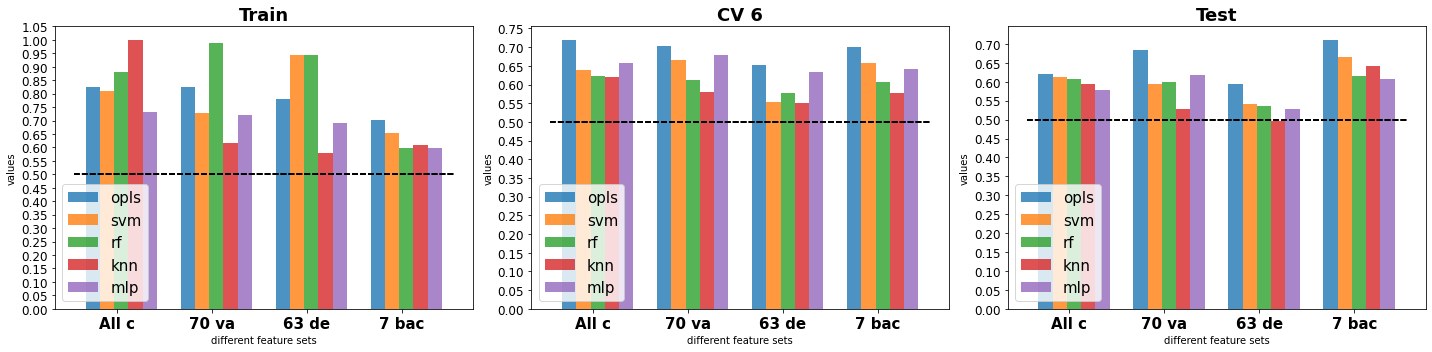

In [37]:
# %conda python -W ignore foo.py
plt.figure(figsize=(20,5))

for i in range(len(splits_names)):
    split_name = splits_names[i]
    result_df = pd.DataFrame(plot_dict[split_name])
    
    approaches = result_df.columns
    variables = list(result_df[approaches[i]].index)
    
    for ii in range(len(approaches)):
        plt.subplot(1,3,i+1)
        plt.xticks(np.arange(len(x_labels))+0.25, x_labels, weight = 'semibold', fontsize=15)
        plt.yticks(np.arange(0,1.1,0.05), weight = 'roman', fontsize=12)
        plt.bar(x = np.arange(len(variables))+(ii*0.15), height=result_df[approaches[ii]], width=0.15, 
                label = approaches[ii], alpha=0.8)
        plt.title('{}'.format(split_name), fontsize=18, weight = 'semibold')

        plt.legend(loc='lower left', fontsize=15)#bbox_to_anchor=(1., 1.))#)
        plt.ylabel('values')
        plt.xlabel('different feature sets')
        
        plt.plot([-0.2, 3.8], [0.5, 0.5], "k--")

plt.tight_layout()
# save_file_name = r"C:\Users\a7mad\Desktop\MEX\data_imgs\results_tfidf\scaled" + "\{0}_{1}_{2}".format(vectorizer, split_size, cv) + ".pdf"
# save_file_name = r"C:\Users\a7mad\Desktop\MEX\data_imgs\results_tfidf\new_results"

# file_path = save_file_name + r"\trimm_{0}_digits_{1}".format(suffix_41, without_digits)+".pdf"
# plt.savefig(file_path)
plt.show()


In [8]:

print(pd.DataFrame(plot_dict['Test']))

                       opls       svm        rf       knn       mlp
All cleaned        0.620676  0.612943  0.606838  0.595238  0.577534
70 variables       0.683150  0.594628  0.600122  0.527473  0.616606
63 descriptors     0.594017  0.540293  0.536020  0.495726  0.526862
7 back. variables  0.710826  0.664835  0.614164  0.642857  0.606227


In [7]:
del dict_all, dict_70v, dict_63d, dict_7b, dicts

In [51]:
data_list, corpus_sentenses, corpus_sentenses_tokenized = nlp_hlp.get_data_from_main_dict(dicts[0], stemm=True, 
        return_corpus_sent=True, return_corpus_token=False, without_digits=True, suffix_41=False)

# x_train, x_test, y_train, y_test = ml_hlp.get_train_test_split_data(data_list, labels, stratify = labels,
#                                               test_size=0.2, random_state=42, shuffle = True)

vectorizer = ml_hlp.get_tfidf_vectorization_model(corpus_sentenses)
#     features = vectorizer.get_feature_names_out()
print("Number of features for each patient is: ", len(vectorizer.get_feature_names_out()))

x_train, x_test, y_train, y_test = ml_hlp.get_train_test_split_data(data_list, labels, stratify = labels,
                                                  test_size=split_size, random_state=random_state, shuffle = True)

In [14]:
# check the features with highest values after tfidf vectorization, and print the word repeated in all sentences,
# see lase row


top_feat = list()
count = 0
vectorizer_vocabs = vectorizer.vocabulary_

data = ml_hlp.get_csr_matrix(vectorizer.transform(data_list))

for j in range(data.shape[0]):
    sample = data[j]
    x = sorted(list(sample), reverse=True)
    id_ =  list()
    values = list()
    for value in x[0:10]:
        values.append(value)
        id_.append(np.where(sample == value)[0])

    # print(values)
    feat_list = list()
    for i in id_:
        for ii in i:
            feat_list.append(list(vectorizer_vocabs.keys())[list(vectorizer_vocabs.values()).index(ii)])
    print(feat_list)
    if j ==0:
        top_feat = feat_list
    if j>0:
        list1 = top_feat
        list2 = feat_list
        top_feat = list(set(list1).intersection(list2))
print(top_feat)

['ja', 'aptit', 'försvunnit', 'trött', 'smak', 'feb', 'ätand', 'svettning', 'förändrat', 'kraftlös', 'orkeslös']
['ja', 'host', 'förändrat', 'hostan', 'satt', 'bröstet', 'feb', 'ont', 'smärt', 'rök']
['ja', 'rök', 'aptit', 'smak', 'aptit', 'smak', 'värk', 'slut', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'trött', 'ont']
['ja', 'andningsproblem', 'ökat', 'host', 'bröstet', 'svårt', 'obehag', 'nedanståend', 'påverk', 'trött']
['ja', 'slem', 'upphostning', 'slem', 'upphostning', 'rök', 'förändrat', 'aptit', 'smak', 'aptit', 'smak', 'ökad', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös']
['ja', 'röstförändring', 'trött', 'rök', 'aptit', 'smak', 'aptit', 'smak', 'värk', 'ont', 'smärt', 'ätand']
['ja', 'rök', 'host', 'förändrat', 'aptit', 'smak', 'aptit', 'smak', 'slut', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'trött']
['ja', 'röst', 'rök', 'flås', 'röstförändring', 'andningsproblem', 'trött', 'beskrivning', 'aptit', 'smak', 'aptit', 'smak']
['ja', 'förändrat', 'rök', 'host', '

['ja', 'trött', 'host', 'förändrat', 'rök', 'slem', 'upphostning', 'slem', 'upphostning', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'aptit', 'smak']
['ja', 'trött', 'ökat', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'andningsproblem', 'röst', 'flås', 'röstförändring', 'rök']
['ja', 'trött', 'andningsproblem', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'rök', 'förändrat', 'aptit', 'smak', 'aptit', 'smak', 'ökad']
['ja', 'host', 'förändrat', 'rök', 'aptit', 'smak', 'aptit', 'smak', 'slut', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'torr']
['ja', 'rök', 'förändrat', 'aptit', 'smak', 'aptit', 'smak', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'torr', 'trött', 'ätand']
['ja', 'rök', 'flås', 'röstförändring', 'aptit', 'smak', 'aptit', 'smak', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'trött', 'förändrat']
['trött', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'ja', 'obehag', 'känsl', 'förändrat', 'rök', 'svårt', 'aptit', 'smak']
['ja', 'host', 'slem', 'upp

['ja', 'host', 'andningsproblem', 'trött', 'aptit', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'nedanståend', 'smak', 'röstförändring']
['ja', 'andningsproblem', 'rök', 'förändrat', 'aptit', 'smak', 'aptit', 'smak', 'obehag', 'slut', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös']
['ja', 'rök', 'aptit', 'smak', 'aptit', 'smak', 'slut', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'trött', 'ätand', 'andning']
['ja', 'aptit', 'host', 'smak', 'ätand', 'andningsproblem', 'mest', 'flås', 'röstförändring', 'rökvan']
['ja', 'rök', 'förändrat', 'aptit', 'smak', 'aptit', 'smak', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'trött', 'smärt', 'ätand']
['ja', 'andningsproblem', 'host', 'röst', 'trött', 'minsk', 'ökat', 'nedanståend', 'värk', 'röstförändring']
['ja', 'värk', 'smärt', 'ont', 'obehag', 'sitt', 'host', 'sid', 'andningsproblem', 'slem', 'upphostning']
['ja', 'slem', 'upphostning', 'slem', 'upphostning', 'trött', 'host', 'kraftlös', 'orkeslös', 'kraftlös', 'orkeslös', 'nedans

In [20]:
# find index of the feature in a patient
# search = ' andr '
# indexes = [m.start() for m in re.finditer('(?=%s)(?!.{1,%d}%s)' % (search, len(search)-1, search), x_train[1])]
# indexes
# del search, indexes
data_list[0]
# x_train

'rökvan aldr kön femal åld 40to65year ont värk smärt obehag känt ömhet ja ont värk smärt obehag sitt flytt ja smak aptit ätand fick sämr aptit ja'

In [22]:
data_list[0]


'åld 40to65year kön femal bor maka make partner sambo ja högst slutförd utbildning universitet högskol född sverige född sverige ja huvudsak sysselsättning pensionär ja nej ja rökvan aldr rökvan slut kategorin rök aldr rökt andning andning ja ta påståend andning andningsproblempåverk ovanståend ja antal andningsbesvär andningsproblem andningsbesvär ja hostan nya host ja slem upphostning ja ja slem upphostning ont värk smärt obehag känt ömhet ja ont värk smärt obehag känt tryckkänsl ja ont värk smärt obehag sitt flytt ja ond värk smärtan obehaget trött kraftlös orkeslös tapp lust ja trött kraftlös orkeslös häng ja ja trött kraftlös orkeslös trött trött kraftlös orkeslös tapp lust försvunnit trött trött kraftlös orkeslös häng försvunnit röst röst förändrat ja upplevd röstförändring röstförändring röst haring nya röstförändring ja smak aptit ätand fick sämr aptit ja aptit smak aptit smak ätand nya smak aptit ätand fick sämr aptit försvunnit aptit smak ätand nya smak aptit ätand njöt mat f

# Evaluation
### Classification report for different metrics, F1, precision, recall

In [17]:
print(ml_hlp.get_classification_report(cls=rf, test_data=X_test, 
                              test_labels=Y_test, target_names=["no cancer","cancer"]))


              precision    recall  f1-score   support

   no cancer       0.41      0.49      0.45        39
      cancer       0.64      0.57      0.61        63

    accuracy                           0.54       102
   macro avg       0.53      0.53      0.53       102
weighted avg       0.55      0.54      0.54       102



## Explaination

## SHAP

In [54]:
x_train, x_test, y_train, y_test = ml_hlp.get_train_test_split_data(data_list, labels, stratify = labels,
                                                  test_size=split_size, random_state=random_state, shuffle = True)
    
vectorizer = ml_hlp.get_tfidf_vectorization_model(corpus_sentenses)
#     features = vectorizer.get_feature_names_out()
print("Number of features for each patient is: ", len(vectorizer.get_feature_names_out()))

all_data_vectorized = ml_hlp.get_tfidf_vectorized_data(tfidf_model=vectorizer,
                                                  to_be_vectorized_data=data_list)

all_data_vectorized = ml_hlp.get_csr_matrix(all_data_vectorized)
min_max = preprocessing.MinMaxScaler()

min_max = min_max.fit(all_data_vectorized)
del all_data_vectorized

X_train_vectorized = ml_hlp.get_tfidf_vectorized_data(tfidf_model=vectorizer,
                                                      to_be_vectorized_data=x_train)
X_test_vectorized = ml_hlp.get_tfidf_vectorized_data(tfidf_model=vectorizer, 
                                                    to_be_vectorized_data=x_test)

X_train = min_max.transform(ml_hlp.get_csr_matrix(X_train_vectorized))
X_test = min_max.transform(ml_hlp.get_csr_matrix(X_test_vectorized))

Y_train = np.array(y_train, dtype='float')
Y_test = np.array(y_test, dtype='float')
del X_train_vectorized, X_test_vectorized, min_max

Number of features for each patient is:  448


In [6]:
shap.initjs()# 

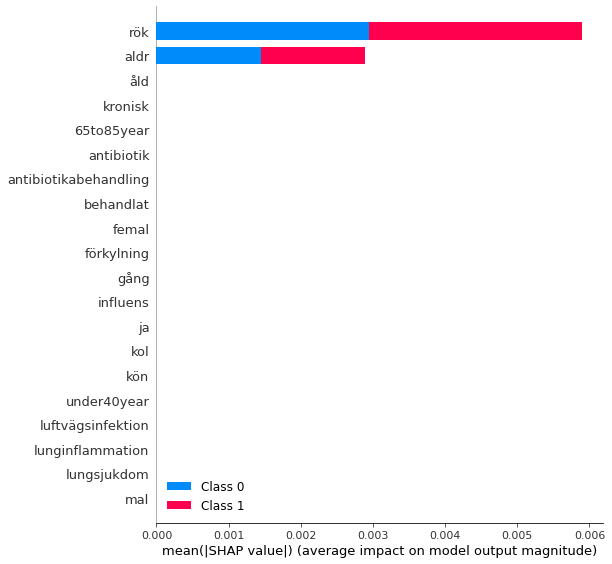

In [7]:
features = vectorizer.get_feature_names_out()
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=features)


In [ ]:

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/102 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

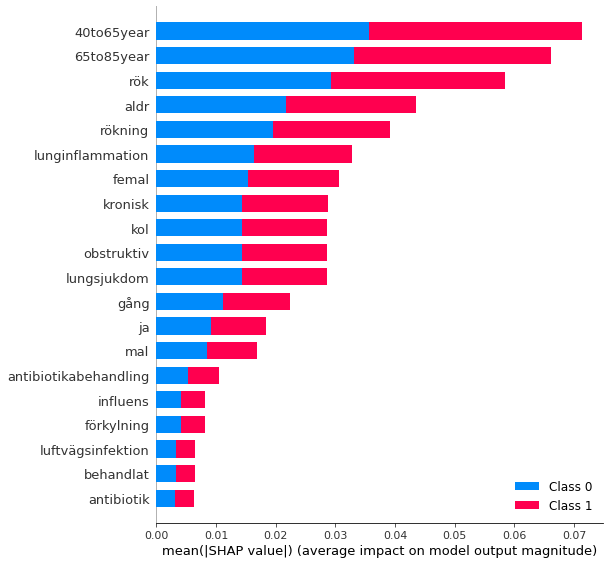

In [17]:
"""
For the models that not based on tree architecture, this should be done, but takes too much time
"""

X_train_summary = shap.kmeans(X_train, 10)

explainer = shap.KernelExplainer(svm.predict_proba, data=X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [ ]:
# find index of the feature in a specific patient
patient_num = 2
search = 'år'
indexes = [m.start() for m in re.finditer('(?=%s)(?!.{1,%d}%s)' % (search, len(search)-1, search), data_list[patient_num])]
# indexes
# print what is around that feature
if indexes:
    for idx in indexes:
        print("found\n ")
        print(data_list[patient_num][idx-30:idx+50])
        print("\n")
else:
    print(data_list[patient_num][0:+50])

## LIME

In [12]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train, mode="classification",
                                             class_names=["No", "Yes"], feature_names=features)
# explainer
idx = random.randint(1, len(X_test))
print("Prediction : ", svm.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", Y_test[idx])


Prediction :  [1.]
Actual :      1.0


In [13]:
explanation = explainer.explain_instance(X_test[idx], svm.predict_proba)
explanation.show_in_notebook()

In [19]:
print(pd.DataFrame(mlp_dict))

       All cleaned  70 variables  63 descriptors   7 back. variables
Train     1.000000      0.994318              0.5           0.636295
CV 6      0.625020      0.684712              0.5           0.689334
Test      0.543287      0.622891              0.5           0.601981


In [20]:
df = pd.DataFrame(mlp_lbfgs_dict)
print(df)

       All cleaned  70 variables  63 descriptors   7 back. variables
Train     1.000000      0.990964              0.5           0.681042
CV 6      0.617038      0.689013              0.5           0.689048
Test      0.592443      0.560528              0.5           0.587307


In [29]:
df = pd.DataFrame(mlp_lbfgs_dict)
print(df)

       All cleaned  70 variables  63 descriptors   7 back. variables
Train     0.957055      0.990964              0.5           0.692064
CV 6      0.558391      0.688552              0.5           0.688119
Test      0.589875      0.504769              0.5           0.570066


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


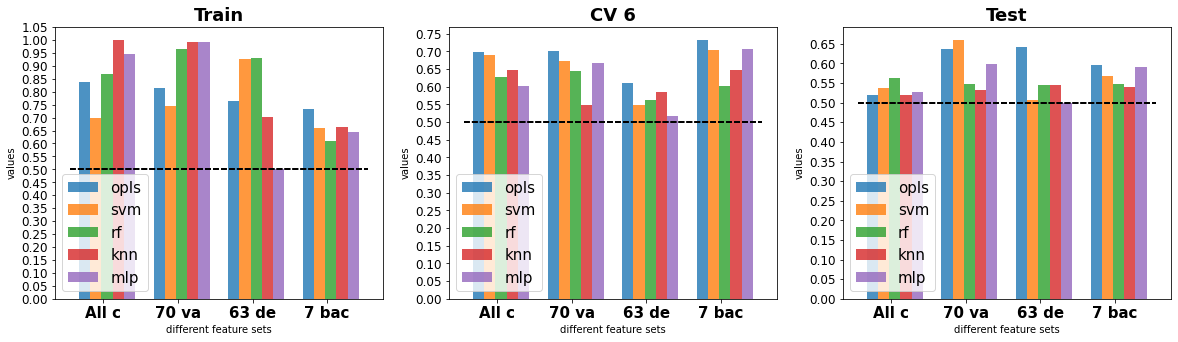

In [19]:
plt.figure(figsize=(20,5))

for i in range(len(splits_names)):
    split_name = splits_names[i]
    result_df = pd.DataFrame(plot_dict[split_name])
    
    approaches = result_df.columns
    variables = list(result_df[approaches[i]].index)
    
    for ii in range(len(approaches)):
        plt.subplot(1,3,i+1)
        plt.xticks(np.arange(len(x_labels))+0.25, x_labels, weight = 'semibold', fontsize=15)
        plt.yticks(np.arange(0,1.1,0.05), weight = 'roman', fontsize=12)
        plt.bar(x = np.arange(len(variables))+(ii*0.15), height=result_df[approaches[ii]], width=0.15, 
                label = approaches[ii], alpha=0.8)
        plt.title('{}'.format(split_name), fontsize=18, weight = 'semibold')

        plt.legend(loc='lower left', fontsize=15)#bbox_to_anchor=(1., 1.))#)
        plt.ylabel('values')
        plt.xlabel('different feature sets')
        
        plt.plot([-0.2, 3.8], [0.5, 0.5], "k--")

    # plt.tight_layout()
# save_file_name = r"C:\Users\a7mad\Desktop\MEX\data_imgs\results_tfidf\scaled" + "\{0}_{1}_{2}".format(vectorizer, split_size, cv) + ".pdf"
save_file_name = r"C:\Users\a7mad\Desktop\MEX\data_imgs\results_tfidf\new_results" + "\{0}_{1}_{2}".format('trimm6_noDigits_withJa_lbl0_1', split_size, cv) + ".pdf"

plt.savefig(save_file_name)
plt.show()

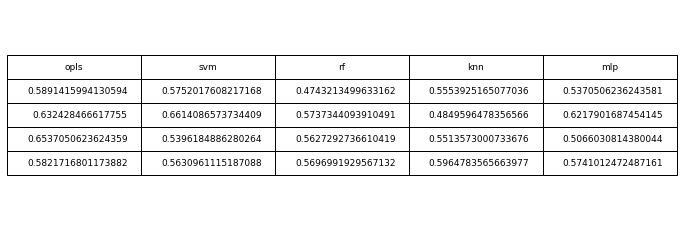

In [20]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(plot_dict['Test'])

table = plt.table(cellText=df.values, colLabels=df.columns, loc='center')
table.set_fontsize(24)
table.scale(2,2)
# fig.tight_layout()

plt.show()

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


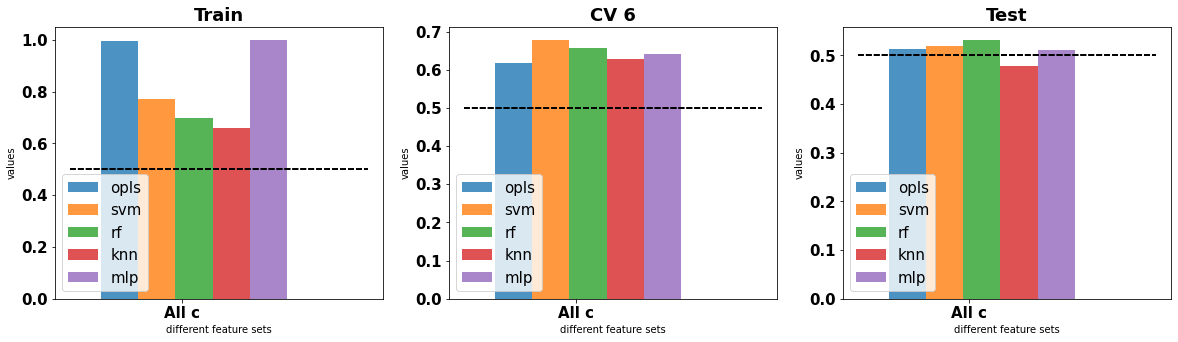

In [31]:
plt.figure(figsize=(20,5))

for i in range(len(splits_names)):
    split_name = splits_names[i]
    result_df = pd.DataFrame(plot_dict[split_name])
    
    approaches = result_df.columns
    variables = list(result_df[approaches[i]].index)
    
    for ii in range(len(approaches)):
        plt.subplot(1,3,i+1)
        plt.xticks(np.arange(len(x_labels))+0.25, x_labels, weight = 'bold', fontsize=15)
        plt.yticks(weight = 'bold', fontsize=15)
        plt.bar(x = np.arange(len(variables))+(ii*0.15), height=result_df[approaches[ii]], width=0.15, 
                label = approaches[ii], alpha=0.8)
        plt.title('{}'.format(split_name), fontsize=18, weight = 'bold')

        plt.legend(loc='lower left', fontsize=15)#bbox_to_anchor=(1., 1.))#)
        plt.ylabel('values')
        plt.xlabel('different feature sets')
        
        plt.plot([-0.2, 1], [0.5, 0.5], "k--")

    # plt.tight_layout()
save_file_name = r"C:\Users\a7mad\Desktop\MEX\data_imgs\results_tfidf\scaled" + "\{0}_{1}_{2}".format('trimmed1', split_size, cv) + ".pdf"

plt.savefig(save_file_name)
plt.show()